<a href="https://colab.research.google.com/github/juanjomar22-glitch/Juan.Marquez/blob/main/Taller_Fallas_Tecnologicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns #Libreria para el trabajo estadistico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= "/content/drive/MyDrive/Linea de enfasis/Integracion de datos y prospectiva/1. FallasTecnológicas.xlsx"
df=pd.read_excel(df, sheet_name=0, header=None)
df.head(10)

,0,1,2,3,4,5
0,Fallas Tecnológicas (Canales Electronicos),NaN,NaN,NaN,NaN,NaN
1,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas (Freq),Valor Generado Promedio (Millones),Descripción Evento
2,2009-01-01 00:00:00,80,14.8058,1,0.5374,"Errores visuales menores, problemas de usabili..."
3,2009-01-02 00:00:00,105,56.4721,4,1.1978,"Errores en la interfaz de usuario, fallas en f..."
4,2009-01-03 00:00:00,70,9.976,5,0.4269,"Errores visuales menores, problemas de usabili..."
5,2009-01-04 00:00:00,105,18.2949,6,1.0814,"Errores en la interfaz de usuario, fallas en f..."
6,2009-01-05 00:00:00,130,23.4112,7,1.2105,"Errores en la interfaz de usuario, fallas en f..."
7,2009-01-06 00:00:00,100,31.5177,3,0.2363,"Errores visuales menores, problemas de usabili..."
8,2009-01-07 00:00:00,115,29.5603,1,0.2737,"Errores visuales menores, problemas de usabili..."
9,2009-01-08 00:00:00,90,36.4063,8,12.4245,"Caída total del sistema por más de 24 horas, p..."


Columnas: Index(['Fechas', 'Transacciones Diarias', 'Valor Transado (millones)',
       'Transacciones Fallidas (Freq)', 'Valor Generado Promedio (Millones)',
       'Descripción Evento'],
      dtype='object', name=1)
1               Fechas  Transacciones Diarias  Valor Transado (millones)  \
0  2009-01-01 00:00:00                     80                    14.8058   
1  2009-01-02 00:00:00                    105                    56.4721   
2  2009-01-03 00:00:00                     70                     9.9760   
3  2009-01-04 00:00:00                    105                    18.2949   
4  2009-01-05 00:00:00                    130                    23.4112   

1  Transacciones Fallidas (Freq)  Valor Generado Promedio (Millones)  \
0                              1                              0.5374   
1                              4                              1.1978   
2                              5                              0.4269   
3                              6    

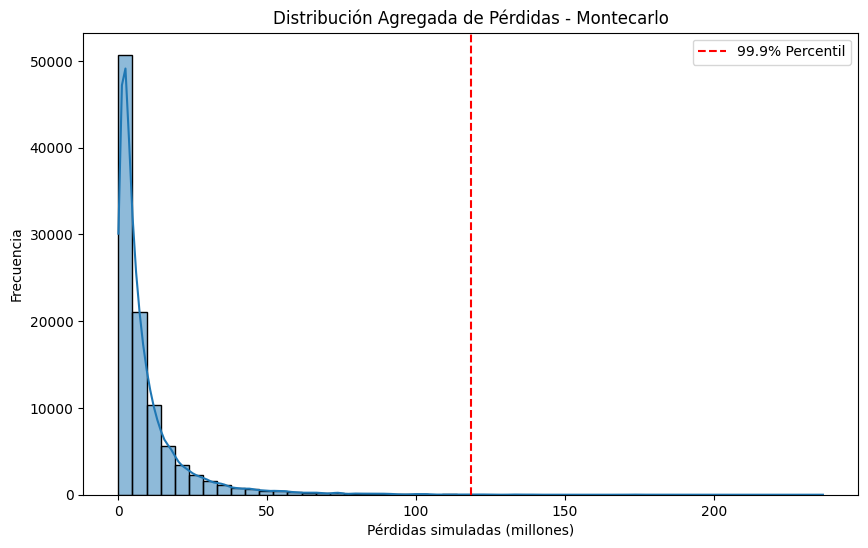

In [ ]:
# 1: Explorar los datos
df.columns = df.iloc[1]
df = df[2:].reset_index(drop=True)

df.columns = df.columns.str.strip()
print("Columnas:", df.columns)

# Convert relevant columns to numeric
numeric_cols = ["Transacciones Diarias", "Valor Transado (millones)",
                "Transacciones Fallidas (Freq)", "Valor Generado Promedio (Millones)"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.head())
print(df.describe())

# Import skew and kurtosis from scipy.stats
from scipy.stats import skew, kurtosis

# 2: Definir variables de frecuencia y severidad
frecuencia = df["Transacciones Fallidas (Freq)"]
severidad = df["Valor Generado Promedio (Millones)"]

# 3: Simulación Montecarlo
N = 100000  # número de simulaciones
simulaciones = []

for i in range(N):
    # muestreo aleatorio de frecuencia y severidad
    f = np.random.choice(frecuencia)
    s = np.random.choice(severidad)
    simulaciones.append(f * s)

simulaciones = np.array(simulaciones)

# 4: Calcular métricas
media = np.mean(simulaciones)
varianza = np.var(simulaciones)
asimetria = skew(simulaciones)
curtosis_val = kurtosis(simulaciones)

print("Media:", media)
print("Varianza:", varianza)
print("Asimetría:", asimetria)
print("Curtosis:", curtosis_val)

# 5: Percentiles
percentil_999 = np.percentile(simulaciones, 99.9)
print("Pérdida catastrófica (99.9%):", percentil_999)

# 6: Visualización
plt.figure(figsize=(10,6))
sns.histplot(simulaciones, bins=50, kde=True)
plt.axvline(percentil_999, color='red', linestyle='--', label='99.9% Percentil')
plt.title("Distribución Agregada de Pérdidas - Montecarlo")
plt.xlabel("Pérdidas simuladas (millones)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()